In [1]:
from blending_libraries import*
from scipy.signal import sepfir2d

In [2]:
def plot_points_with_labels_above(image_path, point1, point2, point3, point4):
    # Convert the points to NumPy arrays and integers
    point1 = np.array(point1, dtype=int)
    point2 = np.array(point2, dtype=int)
    point3 = np.array(point3, dtype=int)
    point4 = np.array(point4, dtype=int)

    # Read the image using OpenCV
    img = image_path.copy()

    # Draw circles at the specified points
    cv2.circle(img, tuple(point1), 5, (0, 0, 255), -1)  # Red color for Point 1
    cv2.circle(img, tuple(point2), 5, (0, 0, 255), -1)  # Red color for Point 2
    cv2.circle(img, tuple(point3), 5, (0, 0, 255), -1)  # Red color for Point 3
    cv2.circle(img, tuple(point4), 5, (0, 0, 255), -1)  # Red color for Point 4

    # Add text labels just above the points
    cv2.putText(img, 'TL', (point1[0], point1[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(img, 'TR', (point2[0], point2[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(img, 'BR', (point3[0], point3[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    cv2.putText(img, 'BL', (point4[0], point4[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    # Display the image with points and labels
    cv2.imshow('Image with Points and Labels Above', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def finding_corners_of_image(img):
    image=img.copy()
    if len(image.shape)==3:
        gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
    corners = np.intp(corners)
    for i in corners: 
        x, y = i.ravel() 
        cv2.circle(image, (x, y), 3, (0,0,255), -1)
    cv2.imshow("image_corners",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return corners

In [4]:
##(23,23)
def checker_board_pattern_display_1(img):
    checker_board_size=(15,8)
    I2=img.copy()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    retval, corners = cv2.findChessboardCorners(I2, checker_board_size, cv2.CALIB_CB_ADAPTIVE_THRESH + \
                                                cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
    C_P=I2.copy()
    print(retval)
    if retval==True:
        
        #corners = cv2.cornerSubPix(I2, corners, (11, 11), (-1, -1), criteria)
        
        C_P=cv2.drawChessboardCorners(I2,checker_board_size,corners,retval)
    
        cv2.imshow("Checker_Board_Pattern",C_P)
        cv2.waitKey(0)
             
        cv2.destroyAllWindows()
    return corners,C_P

In [5]:
##(23,23)
def checker_board_pattern_display_2(img):
    checker_board_size=(23,23)
    I2=img.copy()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    #I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2GRAY)
    retval, corners = cv2.findChessboardCorners(I2, checker_board_size, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+\
                                                cv2.CALIB_CB_NORMALIZE_IMAGE)
    C_P=I2.copy()
    print(retval)
    if retval==True:
        
        #corners = cv2.cornerSubPix(I2, corners, (11, 11), (-1, -1), criteria)
        
        C_P=cv2.drawChessboardCorners(I2,checker_board_size,corners,retval)
    
        cv2.imshow("Checker_Board_Pattern",C_P)
        cv2.waitKey(0)
             
        cv2.destroyAllWindows()
    return corners,C_P

In [6]:
def create_gradient_image(size_x, size_y):
    # Create a black image
    gradient_image = np.zeros((size_x, size_y), dtype=np.uint8)

    # Calculate the center of the image
    center_x, center_y = size_x // 2, size_y // 2

    # Create a meshgrid for coordinates
    x, y = np.meshgrid(np.arange(size_y), np.arange(size_x))

    # Calculate Manhattan distance from the center
    distance = np.abs(x - center_y) + np.abs(y - center_x)

    # Normalize the distance to range [0, 255]
    normalized_distance = (distance / distance.max()) * 255

    # Invert the gradient so that center pixels have higher values
    inverted_gradient = 255 - normalized_distance

    # Assign pixel values to the image
    gradient_image[:, :] = inverted_gradient

    return gradient_image


In [7]:
#########corners_in_black_and_white#####################
def findTopLeft(img):
    TL = None
    height, width = img.shape
    loopBreak = False
    for k in range(0,height):
        i=k
        j=0
        while(i>=0 and i< height and j>=0 and j<width):
            if img[i][j] == 255:
                TL = [i,j]
                loopBreak = True
                break
            i -= 1
            j += 1
        if loopBreak:
            break
    
    if TL == None:
        loopBreak = False
        for k in range(height,width):
            i = 0
            j = k
            while(i>=0 and i< height and j>=0 and j<width):
                if img[i][j] == 255:
                    TL = [i,j]
                    loopBreak = True
                    break
                i += 1
                j -= 1
            if loopBreak:
                break
                
    if TL == None:
        loopBreak = False
        for k in range(0,height):
            i = k
            j = width-1
            while(i>=0 and i< height and j>=0 and j<width):
                if img[i][j] == 255:
                    TL = [i,j]
                    loopBreak = True
                    break
                i += 1
                j -= 1
            if loopBreak:
                break
    return TL
def findTopRight(img):
    TR = None
    height, width = img.shape
    loopBreak = False    
    for k in range(width-1,-1,-1):
        i = 0
        j = k
        while(i>=0 and i< height and j>=0 and j<width):
            if img[i][j] == 255:
                TR = [i,j]
                loopBreak = True
                break
            i += 1
            j += 1
        if loopBreak:
            break
                
    if TR == None:
        loopBreak = False
        for k in range(0,height):
            i = k
            j = 0
            while(i>=0 and i< height and j>=0 and j<width):
                if img[i][j] == 255:
                    TR = [i,j]
                    loopBreak = True
                    break
                i += 1
                j += 1
            if loopBreak:
                break
    return TR
def findBottomRight(img):
    BR = None
    height, width = img.shape
    loopBreak = False
    for k in range(width-1,-1,-1):
        i = height-1
        j = k
        while(i>=0 and i< height and j>=0 and j<width):
            if img[i][j] == 255:
                BR = [i,j]
                loopBreak = True
                break
            i -= 1
            j += 1
        if loopBreak:
            break
    
    if BR == None:
        loopBreak = False
        for k in range(height-1,-1,-1):
            i = k
            j = 0
            while(i>=0 and i< height and j>=0 and j<width):
                if img[i][j] == 255:
                    BR = [i,j]
                    loopBreak = True
                    break
                i -= 1
                j += 1
            if loopBreak:
                break
    return BR
def findBottomLeft(img):
    BL = None
    height, width = img.shape
    loopBreak = False
    for k in range(width):
        i = height-1
        j = k
        while(i>=0 and i< height and j>=0 and j<width):
            if img[i][j] == 255:
                BL = [i,j]
                loopBreak = True
                break
            i -= 1
            j -= 1
        if loopBreak:
            break
    
    if BL == None:
        loopBreak = False
        for k in range(height-1,-1,-1):
            i = k
            j = width-1
            while(i>=0 and i< height and j>=0 and j<width):
                if img[i][j] == 255:
                    BL = [i,j]
                    loopBreak = True
                    break
                i -= 1
                j -= 1
            if loopBreak:
                break
    return BL

def findCornersOfQuadrilateral(image):
    image2 = image.copy()
    image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    Threshold = 200
    ret, binary_image = cv2.threshold(image2, Threshold, 255, cv2.THRESH_BINARY)
    return [findTopLeft(binary_image),findTopRight(binary_image),findBottomRight(binary_image),findBottomLeft(binary_image)]

def checkTheCorners(image,corners):
    image2 = image.copy()
    image2 = cv2.circle(image2,corners[0][::-1],5,(0,0,255),-1)
    image2 = cv2.circle(image2,corners[1][::-1],5,(0,255,0),-1)
    image2 = cv2.circle(image2,corners[2][::-1],5,(255,0,0),-1)
    image2 = cv2.circle(image2,corners[3][::-1],5,(0,255,255),-1)
    cv2.imshow("corners",image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return

In [8]:
J_29_S_1=cv2.imread(r'WIN_20240509_16_45_08_Pro.jpg')
J_29_S_2=cv2.imread(r'WIN_20240509_16_45_16_Pro.jpg')

In [9]:
C_P=cv2.imread(r'combained_Dec_14.jpg')

In [10]:
corners=findCornersOfQuadrilateral(C_P)

In [11]:
checkTheCorners(C_P,corners)

In [12]:
Rect_new=np.array([[151,85],[1823,85],[1823,1031],[151,1031]])

In [13]:
corners_proj_1,chk_1=checker_board_pattern_display_2(J_29_S_1)
corners_proj_2,chk_2=checker_board_pattern_display_2(J_29_S_2)

True
True


In [14]:
corners_proj_1

array([[[1082.7336 ,  794.78925]],

       [[1046.0288 ,  794.0925 ]],

       [[1009.6452 ,  793.44   ]],

       ...,

       [[ 389.88696,  368.41415]],

       [[ 356.5053 ,  368.30682]],

       [[ 323.4846 ,  368.37308]]], dtype=float32)

In [15]:
######for shifter  in two places#######
check_1=return_array(corners_proj_1[528][0],corners_proj_1[506][0],corners_proj_1[0][0],corners_proj_1[22][0])
check_2=return_array(corners_proj_2[528][0],corners_proj_2[506][0],corners_proj_2[0][0],corners_proj_2[22][0])
check_1,check_2

(array([[ 323,  368],
        [1085,  359],
        [1082,  794],
        [ 310,  786]]),
 array([[1049,  358],
        [1754,  349],
        [1764,  807],
        [1047,  792]]))

In [16]:
Rect_new

array([[ 151,   85],
       [1823,   85],
       [1823, 1031],
       [ 151, 1031]])

In [17]:

cv2.circle(J_29_S_1,check_1[0],2,(0,0,255),5)
cv2.circle(J_29_S_1,check_1[1],2,(0,255,0),5)
cv2.circle(J_29_S_1,check_1[2],2,(255,0,0),5)
cv2.circle(J_29_S_1,check_1[3],2,(255,255,255),5)
cv2.imshow("_",J_29_S_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cv2.circle(J_29_S_2,check_2[0],2,(0,0,255),5)
cv2.circle(J_29_S_2,check_2[1],2,(0,255,0),5)
cv2.circle(J_29_S_2,check_2[2],2,(255,0,0),5)
cv2.circle(J_29_S_2,check_2[3],2,(255,255,255),5)
cv2.imshow("_",J_29_S_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
Rect_Cord=cv2.imread(r'checker_board_25_25.jpg')
cv2.circle(Rect_Cord,(151,   85),2,(0,0,255),5)
cv2.circle(Rect_Cord,(1823,   85),2,(0,255,0),5)
cv2.circle(Rect_Cord,(1823, 1031),2,(255,0,0),5)
cv2.circle(Rect_Cord,(151, 1031),2,(255,255,255),5)
cv2.imshow("_",Rect_Cord)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
Hoomo_JAN_29_proj_1_C=cv2.getPerspectiveTransform(np.float32(check_1),np.float32(Rect_new))
Hoomo_JAN_29_proj_2_C=cv2.getPerspectiveTransform(np.float32(check_2),np.float32(Rect_new))

In [21]:
H_1_C=Hoomo_JAN_29_proj_1_C
H_2_C=Hoomo_JAN_29_proj_2_C

In [22]:
white=np.zeros_like(J_29_S_1)+255
wh_re=cv2.imread(r'rect_box.jpg')
combained_29=cv2.warpPerspective(white,np.linalg.inv(H_1_C),(1920,1080))+cv2.warpPerspective(white,np.linalg.inv(H_2_C),(1920,1080))
cv2.imwrite("Dec_14_back_to_proj_1.jpg",cv2.warpPerspective(combained_29,H_1_C,(1920,1080)))
cv2.imwrite("Dec_14_back_to_proj_2.jpg",cv2.warpPerspective(combained_29,H_2_C,(1920,1080)))

True

In [23]:
cv2.imwrite(r'back_to_camera_1.jpg',cv2.warpPerspective(white,np.linalg.inv(H_1_C),(1920,1080)))
cv2.imwrite(r'back_to_camera_2.jpg',cv2.warpPerspective(white,np.linalg.inv(H_2_C),(1920,1080)))


True

In [24]:
cv2.imshow(r'op',J_29_S_1+cv2.imread(r'back_to_camera_1.jpg'))
cv2.imshow(r'BGBGB',cv2.imread(r'back_to_camera_1.jpg'))
cv2.imshow(r'op_2',J_29_S_2+cv2.imread(r'back_to_camera_2.jpg'))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
cv2.imshow("VWRVWVWer",combained_29)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cv2.imwrite("combained_Dec_14.jpg",combained_29)

True

In [27]:
cv2.imwrite(r'back_to_proj_1_dec_14.jpg',cv2.warpPerspective(combained_29,H_1_C,(1920,1080)))
cv2.imwrite(r'back_to_proj_2_dec_14.jpg',cv2.warpPerspective(combained_29,H_2_C,(1920,1080)))

True

In [28]:
combained_white=cv2.bitwise_or(cv2.warpPerspective(white,np.linalg.inv(H_1_C),(1920,1080)),cv2.warpPerspective(white,np.linalg.inv(H_2_C),(1920,1080)))

In [29]:
blend_white=cv2.bitwise_and(cv2.warpPerspective(white,np.linalg.inv(H_1_C),(1920,1080)),cv2.warpPerspective(white,np.linalg.inv(H_2_C),(1920,1080)))

In [30]:
cv2.imshow("VVEVEFDvb",blend_white)
cv2.imshow("avavsdav",combained_white)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [31]:
cv2.imwrite(r'over_lap_image.jpg',blend_white)

True

In [32]:
cv2.imwrite(r'combined_white.jpg',combained_white)

True

In [33]:
edge_1=edge_detector(cv2.imread(r'back_to_proj_1_dec_14.jpg'),3)
edge_2=edge_detector(cv2.imread(r'back_to_proj_2_dec_14.jpg'),3)

In [34]:
exp_1=cv2.imread(r'back_to_proj_1_dec_14.jpg')
exp_2=cv2.imread(r'back_to_proj_2_dec_14.jpg')

In [35]:
edge_exp_1=edge_detector(exp_1,3)
edge_exp_2=edge_detector(exp_2,3)

In [36]:
blen_in_proj_1_dec_14=cv2.warpPerspective(blend_white,H_1_C,(1920,1080))
blen_in_proj_2_dec_14=cv2.warpPerspective(blend_white,H_2_C,(1920,1080))

In [37]:
cv2.imshow("blen_in_proj_1_dec_14",blen_in_proj_1_dec_14)
cv2.imshow("blen_in_proj_2_dec_14",blen_in_proj_2_dec_14)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
cv2.imwrite(r'blen_in_proj_1_dec_14.jpg',blen_in_proj_1_dec_14)
cv2.imwrite(r'blen_in_proj_2_dec_14.jpg',blen_in_proj_2_dec_14)

True

In [39]:
black_blend_proj_1=cv2.imread(r'blen_in_proj_1_dec_14.jpg')
black_blend_proj_2=cv2.imread(r'blen_in_proj_2_dec_14.jpg')

In [40]:
black_blend_proj_1.shape,black_blend_proj_2.shape

((1080, 1920, 3), (1080, 1920, 3))

In [41]:
edges_image_proj_1=edge_detector(black_blend_proj_1,3)
edges_image_proj_2=edge_detector(black_blend_proj_2,3)

In [42]:
refinde_blend_1=filling_poly(edges_image_proj_1)
refinde_blend_2=filling_poly(edges_image_proj_2)

[ 542. 1757.]
[535.  197.5]


In [43]:
H_P_1_C=np.linalg.inv(H_1_C)
H_C_P_1=H_1_C
H_P_2_C=np.linalg.inv(H_2_C)
H_C_P_2=H_2_C
target_coordinates = [(x, y) for x in range(1920) for y in range(1080)]

In [44]:
weights=np.zeros_like(cv2.cvtColor(black_blend_proj_1,cv2.COLOR_BGR2GRAY))
weights=np.float64(weights)
for i in range(0,1080):
    for j in range(0,1920):
        U=i/1080
        V=j/1920 
        weights[i,j]=min(U,1-U,V,1-V)

In [45]:
neg_weights=1-weights

In [46]:
cv2.imshow("op",weights)
cv2.imshow("neg_op",neg_weights)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
cv2.imwrite("weights_1.jpg",weights*255)
cv2.imwrite("weights_2.jpg",weights*255)

True

In [48]:
pts_29_jan_1=np.argwhere(cv2.cvtColor(blen_in_proj_1_dec_14,cv2.COLOR_BGR2GRAY)!=0)

pts_29_jan_2=np.argwhere(cv2.cvtColor(blen_in_proj_2_dec_14,cv2.COLOR_BGR2GRAY)!=0)

In [49]:
len(pts_29_jan_1),len(pts_29_jan_2)

(324245, 382740)

In [50]:
H_1_2=H_2_C@np.linalg.inv(H_1_C)

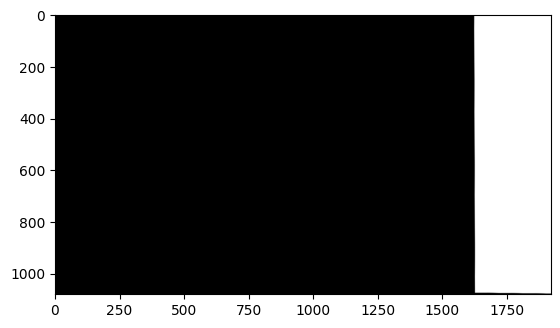

In [51]:
plt.imshow(cv2.warpPerspective(blen_in_proj_2_dec_14,np.linalg.inv(H_1_2),(1920,1080)))

In [52]:
dummy=np.zeros([blen_in_proj_1_dec_14.shape[0]*2,blen_in_proj_1_dec_14.shape[1]*2,3])
dummy_2=np.zeros_like(dummy)
dummy_3=np.zeros([blen_in_proj_1_dec_14.shape[0]*2,blen_in_proj_1_dec_14.shape[1]*2,3])
dummy_4=np.zeros_like(dummy_2)
PTS_CORR_2={}
c=0
c_1=0
c_2=0
cc=0
PTS_CORR={}


for point in pts_29_jan_1:
    vaal=H_1_2@np.array([[point[1]],[point[0]],[1]])
    vaal/=vaal[-1]
    #print(point,"point_corres_is",vaal)
    PTS_CORR[point[1],point[0]]=(np.abs(int(vaal[0])),np.abs(int(vaal[1])))
    dummy[int(vaal[1]),int(vaal[0]),:]=255
    c+=1
    if (vaal[0]>0) and (vaal[1]>0):
        c_1+=1
        dummy_2[int(vaal[1]),int(vaal[0]),:]=255


for pt in pts_29_jan_2:
    vaal=np.linalg.inv(H_1_2)@np.array([[pt[1]],[pt[0]],[1]])
    vaal/=vaal[-1]
    #print(pt,"point_corres_is",vaal)
        
    dummy_3[int(vaal[1]),int(vaal[0]),:]=255
    
    #dummy_4[int(vaal[1]),int(vaal[0]),:]=255
    
    PTS_CORR_2[pt[1],pt[0]]=(np.abs(int(vaal[0])),np.abs(int(vaal[1])))
    
    cc+=1
    if(vaal[0]>1080) and (vaal[1]>1920):
        c_2+=0
        dummy_3[int(vaal[1]),int(vaal[0]),:]=255
             

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


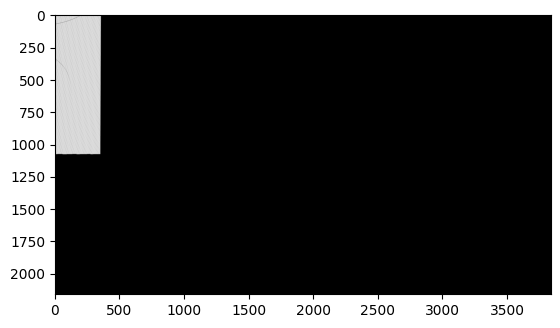

In [53]:
plt.imshow(dummy_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


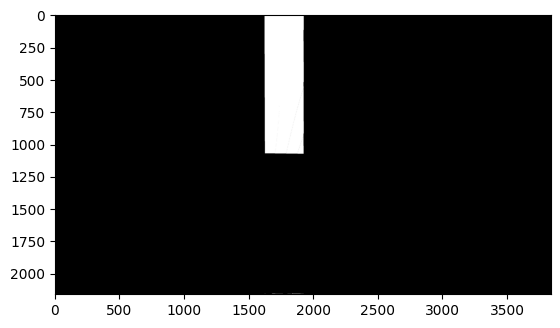

In [54]:
plt.imshow(dummy_3)

In [55]:
cv2.imshow("dummmy",dummy)
cv2.imshow("dummmy_2",dummy_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
cv2.imwrite("dummy_2.jpg",dummy_2[0:1080,0:1920,:])

True

In [57]:
c_1,c_2,c,cc

(322191, 0, 324245, 382740)

In [58]:
cv2.imshow("cadc",dummy_2[0:1080,0:1920,:])
cv2.imshow("cadcadcadc",dummy_3[0:1080,0:1920,:])

cv2.waitKey(0)
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


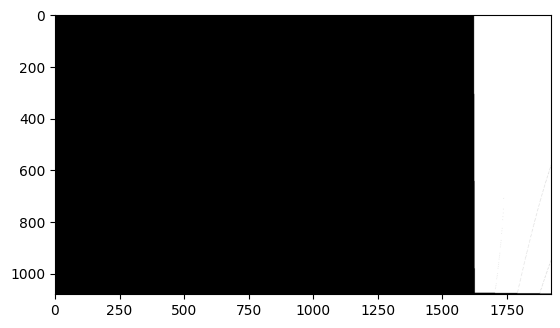

In [59]:
plt.imshow(dummy_3[0:1080,0:1920])

In [60]:
len(pts_29_jan_1),len(pts_29_jan_2)

(324245, 382740)

In [61]:
unique_values = set()

# Create a new dictionary without duplicate values
filtered_dict = {}
for key, value in PTS_CORR.items():
    if value not in unique_values:
        filtered_dict[key] = value
        unique_values.add(value)

#print(filtered_dict)

In [62]:
len(PTS_CORR),len(filtered_dict)

(324245, 322358)

In [63]:
unique_values_2 = set()

# Create a new dictionary without duplicate values
filtered_dict_2= {}
for key, value in PTS_CORR_2.items():
    if value not in unique_values_2:
        filtered_dict_2[key] = value
        unique_values_2.add(value)

#print(filtered_dict_2)

In [64]:
len(PTS_CORR_2),len(filtered_dict_2)

(382740, 323740)

In [65]:
filter_dict_1={key:value for key,value in filtered_dict.items() if value[0]<=1919}
print(len(filter_dict_1))
filter_dict_1={key:value for key,value in filter_dict_1.items() if value[1]<=1079}
print(len(filter_dict_1))

322358
322073


In [66]:
new_dict = {key: value for key, value in filtered_dict_2.items() if value[0] <= 1919}
new_dict = {key: value for key, value in new_dict.items() if value[1] <= 1079}

In [67]:
len(new_dict)

322506

In [68]:
ble_1=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_1=np.float32(ble_1)
ble_2=np.float32(ble_2)

In [69]:
ble_1_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_2_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_1_2=np.float32(ble_1_2)
ble_2_2=np.float32(ble_2_2)

In [70]:
count_half_1=0
for kys,vls in filter_dict_1.items():
    V_1=weights[kys[1],kys[0]]
    V_2=weights[vls[1],vls[0]]
    if V_1==0 and V_2==0:
        count_half_1+=0 
        WT_1=0.5
        WT_2=0.5
        count_half_1+=1
    else:
        WT_1=(1.0)*V_1/(V_1+V_2)
        WT_2=V_2/(V_1+V_2)
    ble_1[kys[1],kys[0],:]=WT_1
    ble_2[vls[1],vls[0],:]=WT_2
    

In [71]:
count_half_2=0
for kys,vls in new_dict.items():
    V_1=weights[kys[1],kys[0]]
    V_2=weights[vls[1],vls[0]]
    if V_1==0 and V_2==0:
        count_half_2+=1
        WT_1=0.5
        WT_2=0.5
    else:
        WT_1=(1.0)*V_1/(V_1+V_2)
        WT_2=V_1/(V_1+V_2)
    ble_1_2[kys[1],kys[0],:]=WT_1
    ble_2_2[vls[1],vls[0],:]=WT_2

#count_half_1,count_half_2    

In [72]:
cv2.imshow("ble_1",ble_1)
cv2.imshow("ble_2",ble_2_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
cv2.imshow("ble_1",ble_2)
cv2.imshow("ble_2",ble_1_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
cv2.imshow("ble_1",remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_2_2))))

#cv2.imshow("ble_2",remove_pixel_HOR_VER(ble_1_2))
#cv2.imshow("ble_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2)))

cv2.imshow("ble_H_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2))))))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [75]:
cv2.imwrite("screen_1_ref.jpg",ble_2_2*255)

True

In [76]:
def remove_pixel_HW(image):
    img = np.copy(image)
    bC = img[:, :, 0]
    gC = img[:,:,1]
    rC = img[:,:,2]
    h,w,_ = img.shape
    bC2 = img[:,:,0]
    for row in range(0,h):
        for i in range(1,w-1):
            if bC[row][i]>bC[row][i-1] and  bC[row][i]>bC[row][i+1]:
                bC2[row][i] = (bC[row][i-1]/2 + bC[row][i+1]/2)

    gC2 = img[:,:,1]
    for row in range(0,h):
        for i in range(1,w-1):
            if gC[row][i]>gC[row][i-1] and  gC[row][i]>gC[row][i+1]:
                gC2[row][i] = (gC[row][i-1]/2 + gC[row][i+1]/2)

    rC2 = img[:,:,2]
    for row in range(0,h):
        for i in range(1,w-1):
            if rC[row][i]>rC[row][i-1] and  rC[row][i]>rC[row][i+1]:
                rC2[row][i] = (rC[row][i-1]/2 + rC[row][i+1]/2)

    img3 = np.zeros_like(img)
    img3[:,:,0] = bC2
    img3[:,:,1] = gC2
    img3[:,:,2] = rC2
    
    img4 = np.copy(img3)
    bC = img4[:, :, 0]
    gC = img4[:,:,1]
    rC = img4[:,:,2]
    h,w,_ = img4.shape
    bC2 = np.copy(bC)
    for col in range(0,w):
        for i in range(1,h-1):
            if bC[i][col]>bC[i-1][col] and bC[i][col]>bC[i+1][col]:
                bC2[i][col] = (bC[i-1][col]/2 + bC[i+1][col]/2)
    gC2 = np.copy(gC)
    for col in range(0,w):
        for i in range(1,h-1):
            if gC[i][col]>gC[i-1][col] and gC[i][col]>gC[i+1][col]:
                gC2[i][col] = (gC[i-1][col]/2 + gC[i+1][col]/2)
    rC2 = np.copy(rC)
    for col in range(0,w):
        for i in range(1,h-1):
            if rC[i][col]>rC[i-1][col] and rC[i][col]>rC[i+1][col]:
                rC2[i][col] = (rC[i-1][col]/2 + rC[i+1][col]/2)
    img4[:,:,0] = bC2
    img4[:,:,1] = gC2
    img4[:,:,2] = rC2
    
    return img4

In [77]:
cv2.imshow("ble_1",remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1))))

#cv2.imshow("ble_2",remove_pixel_HOR_VER(ble_1_2))
#cv2.imshow("ble_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2)))

cv2.imshow("ble_H_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2))))))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
cv2.imwrite(r'blended_screen_1.jpg',remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1)))*255)
cv2.imwrite(r'blended_screen_2.jpg',remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2)))))*255)

True

In [79]:
def edge_detection(image_path):
    # Read the image
    img = image_path.copy()

    # Apply Gaussian blur to the image
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply the Canny edge detector
    edges = cv2.Canny(blurred, 50, 150)
    #print(edges)
    # Display the result
    cv2.imshow('Original Image', img)
    cv2.imshow('Edge Detection', edges)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return edges

In [80]:
def replace_pixels(image1, image2):
    # Read the images
    img1 = image1.copy()
    img2 = image2.copy()

    # Convert images to grayscale
    edge=edge_detection(image1)
    if len(edge.shape)==3:
        gray1 = cv2.cvtColor(edge, cv2.COLOR_BGR2GRAY)
    else:
        gray1=edge
    # Find coordinates where pixel value is 255 in the first image
    row, col = np.where(gray1 == 255)
    
    
    
    # Replace pixels in the first image with corresponding pixels from the second image
    for r, c in zip(row, col):
        img1[r-4:r+4, c-4:c+4] = img2[r-4:r+4, c-4:c+4]

    # Display the result
    cv2.imshow('Result', img1)
    cv2.imshow('Result2', img2)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return img1

In [81]:
def normalize_color_image(image_path):
    # Read the color image
    img = image_path.copy()

    # Get the dimensions of the image
    height, width, _ = img.shape

    # Calculate the distance from each pixel to the center
    y, x = np.ogrid[:height, :width]
    distance_to_center = np.sqrt((x - width // 2)**2 + (y - height // 2)**2)

    # Normalize each color channel separately
    normalized_image = np.zeros_like(img, dtype=np.float32)
    for channel in range(3):
        channel_values = img[:,:,channel]
        normalized_channel = 1 - (distance_to_center / distance_to_center.max())
        normalized_image[:,:,channel] = (normalized_channel * channel_values / 255.0).clip(0, 1)

    # Display the result
    cv2.imshow('Original Image', img)
    cv2.imshow('Normalized Image', (normalized_image * 255).astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [82]:
from scipy.ndimage import distance_transform_edt

In [83]:
def bwdist_equivalent(image_path):
    # Read the binary image
    img = image_path.copy()

    # Threshold the image to obtain a binary image
    _, binary_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

    # Compute the Euclidean distance transform
    distance_transform = distance_transform_edt(binary_image)

    # Normalize the distance transform to the range [0, 1] with inverted values
    normalized_distance_transform = 1 - (distance_transform - distance_transform.min()) / (distance_transform.max() - distance_transform.min())

    # Display the results
    cv2.imshow('Binary Image', binary_image)
    cv2.imshow('Distance Transform', (normalized_distance_transform * 255).astype(np.uint8))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [84]:
def find_polygon_corners(image_path):
    # Read the image in grayscale
    img =image_path.copy()
    if len(img.shape)==3:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        img=img

    # Apply binary thresholding to obtain a binary image
    _, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Assuming the largest contour is the desired polygon
        largest_contour = max(contours, key=cv2.contourArea)

        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(largest_contour, True)
        approx = cv2.approxPolyDP(largest_contour, epsilon, True)

        # Draw the polygon on the original image
        img_with_polygon = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.polylines(img_with_polygon, [approx], isClosed=True, color=(0, 255, 0), thickness=2)

        # Display the image with the detected polygon
        cv2.imshow('Image with Polygon', img_with_polygon)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        # Return the vertices of the polygon
        return approx[:, 0, :]

    else:
        print("No contours found.")
        return None

In [85]:
def min_manhattan_distance(point1, point2):
    return np.min(np.sum(np.abs(point2 - point1), axis=1))

# Example usage:
point1 = np.array([3, 5])
point2 = np.array([[134,528],[175,1422],[653,1418],[660,533]])
min_manhattan_distance(point1,point2)

654

In [183]:
def generate_checkerboard(width, height, rows, cols, color1=(255,255,255), color2=(0,0,0)):
    checkerboard = np.zeros((height, width, 3), dtype=np.uint8)+255
    cell_width = width // cols
    cell_height = height // rows

    for row in range(rows):
        for col in range(cols):
            if (row + col) % 2 == 0:
                checkerboard[row * cell_height: (row + 1) * cell_height,
                             col * cell_width: (col + 1) * cell_width] = color1
            else:
                checkerboard[row * cell_height: (row + 1) * cell_height,
                             col * cell_width: (col + 1) * cell_width] = color2

    return checkerboard

# Dimensions of the image
image_width = 1920*2
image_height = 1080

# Dimensions of the checkerboard
rows = 100
cols = 100

# Generate checkerboard pattern
checkerboard_image = generate_checkerboard(image_width, image_height, rows, cols)

# Display the checkerboard image
cv2.imshow("Checkerboard", checkerboard_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the image
cv2.imwrite("checkerboard_25x25_3840x1080.jpg", checkerboard_image)

True

# RECTANGLE_MAKING

In [86]:
##2nd_APRIL_2024####commbinedd_image################start_here###############################################
combined=cv2.imread(r'combained_Dec_14.jpg')

In [87]:
imageWhereINeedToFindRectangle = cv2.imread(r"combined_white.jpg")

In [88]:
height, width, _ = imageWhereINeedToFindRectangle.shape

In [89]:
white_image = cv2.cvtColor(imageWhereINeedToFindRectangle,cv2.COLOR_BGR2GRAY)
threshold_value = 200
_, binary_image = cv2.threshold(white_image, threshold_value, 255, cv2.THRESH_BINARY)

In [90]:
cv2.imshow("binary_image",binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [91]:
for i in range(height):
    for j in range(width):
        if(binary_image[i][j]==255):
            binary_image[i][j] = 1
        else:
            binary_image[i][j] = 0

np.savetxt(r"binary_array.txt", binary_image, fmt='%d')

amt = binary_image.tolist()
amt2 = [row[:] for row in amt]

In [92]:
cv2.imshow("binary_image",binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [93]:
class Solution():
    def maxHist(self, row):
        # Create an empty stack. The stack holds
        # indexes of hist array / The bars stored
        # in stack are always in increasing order
        # of their heights.
        result = []

        # Top of stack
        top_val = 0

        # Initialize max area in current
        max_area = 0
        # row (or histogram)

        area = 0  # Initialize area with current top

        # Run through all bars of given
        # histogram (or row)
        i = 0
        while (i < len(row)):

            # If this bar is higher than the
            # bar on top stack, push it to stack
            if (len(result) == 0) or (row[result[-1]] <= row[i]):
                result.append(i)
                i += 1
            else:

                # If this bar is lower than top of stack,
                # then calculate area of rectangle with
                # stack top as the smallest (or minimum
                # height) bar. 'i' is 'right index' for
                # the top and element before top in stack
                # is 'left index'
                top_val = row[result.pop()]
                area = top_val * i

                if (len(result)):
                    area = top_val * (i - result[-1] - 1)
                max_area = max(area, max_area)

        # Now pop the remaining bars from stack
        # and calculate area with every popped
        # bar as the smallest bar
        while (len(result)):
            top_val = row[result.pop()]
            area = top_val * i
            if (len(result)):
                area = top_val * (i - result[-1] - 1)

            max_area = max(area, max_area)

        return max_area

    # Returns area of the largest rectangle
    # with all 1s in A
    def maxRectangle(self, A):

        # Calculate area for first row and
        # initialize it as result
        result = self.maxHist(A[0])

        # iterate over row to find maximum rectangular
        # area considering each row as histogram
        print("Max Area Percentage")
        for i in range(1, len(A)):
            print("Percentage Complete :",end=" ")
            print(i/len(A)*100,end="")
            print("%")
            for j in range(len(A[i])):

                # if A[i][j] is 1 then add A[i -1][j]
                if (A[i][j]):
                    A[i][j] += A[i - 1][j]

            # Update result if area with current
            # row (as last row) of rectangle) is more
            result = max(result, self.maxHist(A[i]))

        return result

ans = Solution()
area = ans.maxRectangle(amt)

Max Area Percentage
Percentage Complete : 0.0925925925925926%
Percentage Complete : 0.1851851851851852%
Percentage Complete : 0.2777777777777778%
Percentage Complete : 0.3703703703703704%
Percentage Complete : 0.4629629629629629%
Percentage Complete : 0.5555555555555556%
Percentage Complete : 0.6481481481481481%
Percentage Complete : 0.7407407407407408%
Percentage Complete : 0.8333333333333334%
Percentage Complete : 0.9259259259259258%
Percentage Complete : 1.0185185185185186%
Percentage Complete : 1.1111111111111112%
Percentage Complete : 1.2037037037037037%
Percentage Complete : 1.2962962962962963%
Percentage Complete : 1.3888888888888888%
Percentage Complete : 1.4814814814814816%
Percentage Complete : 1.574074074074074%
Percentage Complete : 1.6666666666666667%
Percentage Complete : 1.7592592592592593%
Percentage Complete : 1.8518518518518516%
Percentage Complete : 1.9444444444444444%
Percentage Complete : 2.037037037037037%
Percentage Complete : 2.1296296296296298%
Percentage Compl

Percentage Complete : 45.0%
Percentage Complete : 45.092592592592595%
Percentage Complete : 45.18518518518518%
Percentage Complete : 45.27777777777778%
Percentage Complete : 45.370370370370374%
Percentage Complete : 45.46296296296296%
Percentage Complete : 45.55555555555556%
Percentage Complete : 45.64814814814815%
Percentage Complete : 45.74074074074074%
Percentage Complete : 45.83333333333333%
Percentage Complete : 45.925925925925924%
Percentage Complete : 46.01851851851852%
Percentage Complete : 46.111111111111114%
Percentage Complete : 46.2037037037037%
Percentage Complete : 46.2962962962963%
Percentage Complete : 46.38888888888889%
Percentage Complete : 46.48148148148148%
Percentage Complete : 46.574074074074076%
Percentage Complete : 46.666666666666664%
Percentage Complete : 46.75925925925926%
Percentage Complete : 46.85185185185185%
Percentage Complete : 46.94444444444444%
Percentage Complete : 47.03703703703704%
Percentage Complete : 47.129629629629626%
Percentage Complete : 47

Percentage Complete : 90.83333333333333%
Percentage Complete : 90.92592592592592%
Percentage Complete : 91.01851851851852%
Percentage Complete : 91.11111111111111%
Percentage Complete : 91.20370370370371%
Percentage Complete : 91.2962962962963%
Percentage Complete : 91.38888888888889%
Percentage Complete : 91.48148148148148%
Percentage Complete : 91.57407407407408%
Percentage Complete : 91.66666666666666%
Percentage Complete : 91.75925925925927%
Percentage Complete : 91.85185185185185%
Percentage Complete : 91.94444444444444%
Percentage Complete : 92.03703703703704%
Percentage Complete : 92.12962962962963%
Percentage Complete : 92.22222222222223%
Percentage Complete : 92.31481481481481%
Percentage Complete : 92.4074074074074%
Percentage Complete : 92.5%
Percentage Complete : 92.5925925925926%
Percentage Complete : 92.68518518518518%
Percentage Complete : 92.77777777777779%
Percentage Complete : 92.87037037037037%
Percentage Complete : 92.96296296296296%
Percentage Complete : 93.0555555

In [94]:
file_path = 'afterArea.txt'

# Open the file in write mode ('w')
with open(file_path, 'w') as file:
    # Write each element of the list to a new line in the file
    for item in amt2:
        file.write(str(item) + '\n')

print(f"The list has been written to {file_path}")

The list has been written to afterArea.txt


In [95]:
possibleRectangles = []
for i in range(1, int(np.sqrt(area)+1)):
    if area%i == 0 and i<=height and area//i<=width and i>= 200:
        possibleRectangles.append([i,area//i])
    if area%i==0 and i<=height and area//i<=width and i>=200:
        possibleRectangles.append([area//i,i])
possibleRectangles.sort()

def findRectangleCoordinates(matrix, N, M):
    rows = len(matrix)
    cols = len(matrix[0]) if rows > 0 else 0

    # Check if the matrix has enough rows for a rectangle of dimension (N, M)
    if rows < N or cols < M:
        return None  # No rectangle of specified dimensions can exist
    print("FindRectangleCoordinates")
    for i in range(rows - N + 1):
        print("Percentage Complete:",end=" ")
        print(i/(rows-N+1)*100,end="")
        print("%")
        for j in range(cols - M + 1):
            # Check if the submatrix of dimensions (N, M) is filled with 1s
            if all(all(matrix[i + x][j + y] == 1 for y in range(M)) for x in range(N)):
                # Return the coordinates of the top-left and bottom-right corners
                return (i, j, i + N - 1, j + M - 1)

    return None  # No rectangle of specified dimensions found
numberOfPossibilities = len(possibleRectangles)
topleftx = 0
toplefty = 0
bottomrightx = 0
bottomrighty = 0
for i in range(numberOfPossibilities):
    N = possibleRectangles[i][0]
    M = possibleRectangles[i][1]
    coordinates = findRectangleCoordinates(amt2,N,M)
    if coordinates!=None:
        topleftx = coordinates[0]
        toplefty = coordinates[1]
        bottomrightx = coordinates[2]
        bottomrighty = coordinates[3]
        break

FindRectangleCoordinates
Percentage Complete: 0.0%
Percentage Complete: 0.1652892561983471%
Percentage Complete: 0.3305785123966942%
Percentage Complete: 0.49586776859504134%
Percentage Complete: 0.6611570247933884%
Percentage Complete: 0.8264462809917356%
Percentage Complete: 0.9917355371900827%
Percentage Complete: 1.1570247933884297%
Percentage Complete: 1.322314049586777%
Percentage Complete: 1.487603305785124%
Percentage Complete: 1.6528925619834711%
Percentage Complete: 1.8181818181818181%
Percentage Complete: 1.9834710743801653%
Percentage Complete: 2.1487603305785123%
Percentage Complete: 2.3140495867768593%
Percentage Complete: 2.479338842975207%
Percentage Complete: 2.644628099173554%
Percentage Complete: 2.809917355371901%
Percentage Complete: 2.975206611570248%
Percentage Complete: 3.1404958677685952%
Percentage Complete: 3.3057851239669422%
Percentage Complete: 3.4710743801652892%
Percentage Complete: 3.6363636363636362%
Percentage Complete: 3.8016528925619832%
Percentage 

In [96]:
rectangle_color = (0, 255, 0)
rt2 = imageWhereINeedToFindRectangle.copy()
rotated_image = cv2.rectangle(rt2, (toplefty, topleftx),
              (bottomrighty, bottomrightx),
              rectangle_color, thickness=1)
cv2.imwrite(r"rectangleMilGaya.jpg",rotated_image)
cv2.imshow('Draw Polygon',rotated_image )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
topLeftx = toplefty
topLefty = topleftx
bottomRightx = bottomrighty
bottomRighty = bottomrightx

In [98]:
RTL = (topLefty,topLeftx)
RTR = (topLefty,bottomRightx)
RBR = (bottomRighty,bottomRightx)
RBL = (bottomRighty,topLeftx)

In [99]:
rt2 = imageWhereINeedToFindRectangle.copy()
RED = (0,0,255)
BLUE = (255,0,0)
GREEN = (0,255,0)
YELLOW = (255,255,0)
rt2 = cv2.circle(rt2, RTL[::-1], 5, RED , -1)
rt2 = cv2.circle(rt2, RTR[::-1], 5, YELLOW , -1)
rt2 = cv2.circle(rt2, RBR[::-1], 5, BLUE , -1)
rt2 = cv2.circle(rt2, RBL[::-1], 5, GREEN , -1)


In [100]:
cv2.imshow('Draw Polygon',rt2 )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [101]:
firstScreen = cv2.imread(r"back_to_camera_1.jpg")
secondScreen = cv2.imread(r"back_to_camera_2.jpg")
cv2.imshow("first",firstScreen)
cv2.imshow("sec",secondScreen)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [102]:
topLeft1,topRight1,bottomRight1,bottomLeft1 = findCornersOfQuadrilateral(firstScreen)
topLeft2,topRight2,bottomRight2,bottomLeft2 = findCornersOfQuadrilateral(secondScreen)

In [103]:
topLeft1,topRight1,bottomRight1,bottomLeft1

([332, 259], [320, 1130], [817, 1128], [806, 243])

In [104]:
print(topLeft1)

[332, 259]


In [105]:
findCornersOfQuadrilateral(firstScreen)

[[332, 259], [320, 1130], [817, 1128], [806, 243]]

In [106]:
topLeft2,topRight2,bottomRight2,bottomLeft2

([321, 990], [308, 1795], [831, 1808], [813, 986])

In [107]:
[topLeft2,topRight2,bottomRight2,bottomLeft2]

[[321, 990], [308, 1795], [831, 1808], [813, 986]]

In [108]:
checkTheCorners(firstScreen,[topLeft1,topRight1,bottomRight1,bottomLeft1])

In [109]:
checkTheCorners(secondScreen,[topLeft2,topRight2,bottomRight2,bottomLeft2])

In [110]:
def intersection2lines(P1,P2,P3,P4):
    m1 = (P2[0]-P1[0])/(P2[1]-P1[1])
    m2 = (P4[0]-P3[0])/(P4[1]-P3[1])
    b1 = P1[0]-m1*P1[1]
    b2 = P3[0]-m2*P3[1]
    x = (b2-b1)/(m1-m2)
    y = m1*x+b1
    return (y,x)

In [111]:
intersection1 = intersection2lines(topRight1,bottomRight1,topLeft2,topRight2)
intersection2 = intersection2lines(bottomRight1,bottomLeft1,topLeft2,bottomLeft2)

In [112]:
intersection5 = intersection2lines(RBL,RBR,topRight1,bottomRight1)
intersection6 = intersection2lines(RBL,RBR,topLeft2,bottomLeft2)
intersection3 = (RTL[0],intersection6[1])
intersection4 = (RTL[0],intersection5[1])

In [113]:
img2 = combained_white.copy()
#img2 = cv2.circle(img2,(int(intersection1[1]),int(intersection1[0])),5,(0,0,255),-1)
#img2 = cv2.circle(img2,(int(intersection2[1]),int(intersection2[0])),5,(0,255,0),-1)
img2 = cv2.rectangle(img2,RTL[::-1],RBR[::-1],(0,0,255),2)
img2 = cv2.circle(img2,(int(intersection3[1]),int(intersection3[0])),5,(0,255,0),-1)
img2 = cv2.circle(img2,(int(intersection4[1]),int(intersection4[0])),5,(0,255,0),-1)
img2 = cv2.circle(img2,(int(intersection5[1]),int(intersection5[0])),5,(0,255,0),-1)
img2 = cv2.circle(img2,(int(intersection6[1]),int(intersection6[0])),5,(0,255,0),-1)
cv2.imshow("img",img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [114]:
source1 = [topLeft1,topRight1,bottomRight1,bottomLeft1]
destination1 = [RTL,intersection4,intersection5,RBL]

source2 = [topLeft2,topRight2,bottomRight2,bottomLeft2]
destination2 = [intersection3,RTR,RBR,intersection6]

In [115]:
destination1

[(332, 259), (332, 1128.040241448692), (807.0, 1128.040241448692), (807, 259)]

In [116]:
destination2

[(332, 986.0487804878048),
 (332, 1796),
 (807, 1796),
 (807.0, 986.0487804878048)]

In [117]:
1084-991

93

In [118]:
combained_new=combained_white.copy()
cv2.circle(combained_new,source1[0][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source1[1][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source1[2][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source1[3][::-1],5,(0,0,255),-1)

cv2.circle(combained_new,source2[0][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source2[1][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source2[2][::-1],5,(0,0,255),-1)
cv2.circle(combained_new,source2[3][::-1],5,(0,0,255),-1)

cv2.circle(combained_new,(int(destination1[0][1]),int(destination1[0][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination1[1][1]),int(destination1[1][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination1[2][1]),int(destination1[2][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination1[3][1]),int(destination1[3][0])),5,(0,255,0),-1)

cv2.circle(combained_new,(int(destination2[0][1]),int(destination2[0][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination2[1][1]),int(destination2[1][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination2[2][1]),int(destination2[2][0])),5,(0,255,0),-1)
cv2.circle(combained_new,(int(destination2[3][1]),int(destination2[3][0])),5,(0,255,0),-1)

cv2.imshow("combained_new",combained_new)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [119]:
destination1

[(332, 259), (332, 1128.040241448692), (807.0, 1128.040241448692), (807, 259)]

In [120]:
source1

[[332, 259], [320, 1130], [817, 1128], [806, 243]]

In [121]:
source_1=np.array([source1[0][::-1],source1[1][::-1],source1[2][::-1],source1[3][::-1]])
source_1

array([[ 259,  332],
       [1130,  320],
       [1128,  817],
       [ 243,  806]])

In [122]:
source_2=np.array([source2[0][::-1],source2[1][::-1],source2[2][::-1],source2[3][::-1]])
source_2

array([[ 990,  321],
       [1795,  308],
       [1808,  831],
       [ 986,  813]])

In [123]:
Rect_screen_1=np.array([[int(destination1[0][1]),int(destination1[0][0])],[int(destination1[1][1]),int(destination1[1][0])],
                        [int(destination1[2][1]),int(destination1[2][0])],[int(destination1[3][1]),int(destination1[3][0])]])


Rect_screen_2=np.array([[int(destination2[0][1]),int(destination2[0][0])],[int(destination2[1][1]),int(destination2[1][0])],
                        [int(destination2[2][1]),int(destination2[2][0])],[int(destination2[3][1]),int(destination2[3][0])]])


In [124]:
Rect_screen_1

array([[ 259,  332],
       [1128,  332],
       [1128,  807],
       [ 259,  807]])

In [125]:
Rect_screen_2

array([[ 986,  332],
       [1796,  332],
       [1796,  807],
       [ 986,  807]])

In [126]:
source_1

array([[ 259,  332],
       [1130,  320],
       [1128,  817],
       [ 243,  806]])

In [127]:
source_2

array([[ 990,  321],
       [1795,  308],
       [1808,  831],
       [ 986,  813]])

In [128]:
H_screen_1_R=cv2.getPerspectiveTransform(np.float32(source_1),np.float32(Rect_screen_1))

H_screen_2_R=cv2.getPerspectiveTransform(np.float32(source_2),np.float32(Rect_screen_2))

In [129]:
cv2.imshow(r'wr_1',cv2.warpPerspective(cv2.imread(r'blended_screen_1.jpg'),np.linalg.inv(H_1_C),(1920,1080)))
cv2.imshow(r'wr_2',cv2.warpPerspective(cv2.imread(r'blended_screen_2.jpg'),np.linalg.inv(H_2_C),(1920,1080)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [130]:
blend_back_to_camera_1=cv2.warpPerspective(cv2.imread(r'blended_screen_1.jpg'),np.linalg.inv(H_1_C),(1920,1080))
blend_back_to_camera_2=cv2.warpPerspective(cv2.imread(r'blended_screen_2.jpg'),np.linalg.inv(H_2_C),(1920,1080))

In [131]:
back_camera_1=cv2.imread(r'back_to_camera_1.jpg')
back_camera_2=cv2.imread(r'back_to_camera_2.jpg')

In [132]:
cv2.imshow(r'wr_1',cv2.warpPerspective(back_camera_1,H_screen_1_R,(1920,1080)))
cv2.imshow(r'wr_2',cv2.warpPerspective(back_camera_2,H_screen_2_R,(1920,1080)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [133]:
rect_1=cv2.warpPerspective(back_camera_1,H_screen_1_R,(1920,1080))
rect_2=cv2.warpPerspective(back_camera_2,H_screen_2_R,(1920,1080))


In [134]:
cv2.imshow("rect_1",rect_1)
cv2.imshow("rect_2",rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [135]:
weights=np.zeros_like(cv2.cvtColor(back_camera_1,cv2.COLOR_BGR2GRAY))
weights=np.float64(weights)
for i in range(0,1080):
    for j in range(0,1920):
        U=i/1080
        V=j/1920 
        weights[i,j]=min(U,1-U,V,1-V)

In [136]:
###########################rect_weights#####################
wgts=weights.copy()
cv2.imshow("weights",wgts)
cv2.imshow("weights_screen_1",cv2.warpPerspective(wgts,np.linalg.inv(H_1_C),(1920,1080)))
wgts_screen_1=cv2.warpPerspective(wgts,np.linalg.inv(H_1_C),(1920,1080))
cv2.imshow(r'weights_screen_rect',cv2.warpPerspective(wgts_screen_1,H_screen_1_R,(1920,1080)))
wgts_screen_1_rect=cv2.warpPerspective(wgts_screen_1,H_screen_1_R,(1920,1080))
cv2.imshow(r'wgts_rect_screen_1',cv2.warpPerspective(wgts_screen_1_rect,H_1_C,(1920,1080)))
wgts_screen_1_back=cv2.warpPerspective(wgts_screen_1_rect,H_1_C,(1920,1080))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [137]:
wgts=weights.copy()
cv2.imshow("weights",wgts)
cv2.imshow("weights_screen_2",cv2.warpPerspective(wgts,np.linalg.inv(H_2_C),(1920,1080)))
wgts_screen_2=cv2.warpPerspective(wgts,np.linalg.inv(H_2_C),(1920,1080))
cv2.imshow(r'weights_screen_rect',cv2.warpPerspective(wgts_screen_1,H_screen_2_R,(1920,1080)))
wgts_screen_2_rect=cv2.warpPerspective(wgts_screen_2,H_screen_2_R,(1920,1080))
cv2.imshow(r'wgts_rect_screen_2',cv2.warpPerspective(wgts_screen_2_rect,H_2_C,(1920,1080)))
wgts_screen_2_back=cv2.warpPerspective(wgts_screen_2_rect,H_1_C,(1920,1080))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [138]:
cv2.imshow(r'rect_1',rect_1)
cv2.imshow(r'rect_2',rect_2)
cv2.imshow(r'opp_rect',cv2.bitwise_or(rect_1,rect_2,mask=None))
cv2.imshow(r'blend_gap',cv2.bitwise_and(rect_1,rect_2,mask=None))
blend_white_rect=cv2.bitwise_and(rect_1,rect_2,mask=None)
cv2.imshow(r'bled_screen_1',cv2.warpPerspective(blend_white_rect,H_1_C,(1920,1080)))
cv2.imshow(r'bled_screen_2',cv2.warpPerspective(blend_white_rect,H_2_C,(1920,1080)))
blend_white_rect_back_1=cv2.warpPerspective(blend_white_rect,H_1_C,(1920,1080))
blend_white_rect_back_2=cv2.warpPerspective(blend_white_rect,H_2_C,(1920,1080))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [139]:
blend_white_rect_back_1.shape,weights.shape

((1080, 1920, 3), (1080, 1920))

In [140]:
cv2.imshow(r'R_w_1',cv2.warpPerspective(rect_1,H_1_C,(1920,1080)))
cv2.imshow(r'R_w_2',cv2.warpPerspective(rect_2,H_2_C,(1920,1080)))
#cv2.imshow(r'blend_white_rect_back_1',blend_white_rect_back_1)
#cv2.imshow(r'blend_white_rect_back_2',blend_white_rect_back_2)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [141]:
cv2.imwrite(r'rect_screen_1.jpg',cv2.warpPerspective(rect_1,H_1_C,(1920,1080)))
cv2.imwrite(r'rect_screen_2.jpg',cv2.warpPerspective(rect_2,H_2_C,(1920,1080)))

True

In [142]:
pts_screen_1=np.argwhere(cv2.cvtColor(blend_white_rect_back_1,cv2.COLOR_BGR2GRAY)!=0)

pts_screen_2=np.argwhere(cv2.cvtColor(blend_white_rect_back_1,cv2.COLOR_BGR2GRAY)!=0)



In [143]:
H_new_rect=H_screen_1_R@np.linalg.inv(H_1_C)
WTY=np.zeros([1080,1920])+255

cv2.imshow("screen_1",cv2.warpPerspective(WTY,H_1_C@np.linalg.inv(H_2_C),(1920,1080)))
cv2.imshow("ascac",cv2.warpPerspective(WTY,H_1_C@H_screen_2_R@np.linalg.inv(H_2_C),(1920,1080)))
#PPPP=cv2.warpPerspective(WTY,H_screen_1_R@np.linalg.inv(H_1_C),(1920,1080))
#cv2.imshow("op",cv2.warpPerspective(PPPP,H_2_C,(1920,1080)))
cv2.imshow("ascac2",cv2.warpPerspective(WTY,H_2_C@H_screen_1_R@np.linalg.inv(H_1_C),(1920,1080)))


#op=cv2.warpPerspective(WTY,np.linalg.inv(H_1_C),(1920,1080))
#cv2.imshow("vcdasvcasd",cv2.warpPerspective(op,H_screen_1_R,(1920,1080)))

#OPPPP=cv2.warpPerspective(op,H_screen_1_R,(1920,1080))
#cv2.imshow("vcdasvcasd",cv2.warpPerspective(OPPPP,H_1_C,(1920,1080)))


cv2.waitKey(0)
cv2.destroyAllWindows()

In [144]:
pts_screen_1[0]

array([  20, 1682], dtype=int64)

In [145]:
H_RECT_1_2=H_1_C@H_screen_2_R@np.linalg.inv(H_2_C)
H_RECT_2_1=H_2_C@H_screen_1_R@np.linalg.inv(H_1_C)

In [146]:
w=np.zeros([1080,1920])+255
cv2.imshow("w",cv2.warpPerspective(w,np.linalg.inv(H_1_C),(1920,1080)))
ww=cv2.warpPerspective(w,np.linalg.inv(H_1_C),(1920,1080))
cv2.imshow("WWW",cv2.warpPerspective(ww,H_2_C,(1920,1080)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [147]:
dummy=np.zeros([blend_white_rect_back_1.shape[0]*2,blend_white_rect_back_1 .shape[1]*2,3])
dummy_2=np.zeros_like(dummy)
dummy_3=np.zeros([blend_white_rect_back_2.shape[0]*2,blend_white_rect_back_2.shape[1]*2,3])
dummy_4=np.zeros_like(dummy_2)
PTS_CORR_2={}
c=0
c_1=0
c_2=0
cc=0
PTS_CORR={}


for point in pts_screen_1:
    vaal=H_RECT_1_2@np.array([[point[1]],[point[0]],[1]])
    vaal/=vaal[-1]
    #print(point,"point_corres_is",vaal)
    PTS_CORR[point[1],point[0]]=(np.abs(int(vaal[0])),np.abs(int(vaal[1])))
    dummy[int(vaal[1]),int(vaal[0]),:]=255
    c+=1
    if (vaal[0]>0) and (vaal[1]>0):
        c_1+=1
        dummy_2[int(vaal[1]),int(vaal[0]),:]=255


for pt in pts_screen_2:
    vaal=H_RECT_2_1@np.array([[pt[1]],[pt[0]],[1]])
    vaal/=vaal[-1]
    #print(pt,"point_corres_is",vaal)
        
    dummy_3[int(vaal[1]),int(vaal[0]),:]=255
    
    #dummy_4[int(vaal[1]),int(vaal[0]),:]=255
    
    PTS_CORR_2[pt[1],pt[0]]=(np.abs(int(vaal[0])),np.abs(int(vaal[1])))
    
    cc+=1
    if(vaal[0]>1080) and (vaal[1]>1920):
        c_2+=0
        dummy_3[int(vaal[1]),int(vaal[0]),:]=255
             

In [148]:
cv2.imshow("dummy_2",dummy_2)
cv2.imshow("dummy_3",dummy_3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [149]:
unique_values = set()

# Create a new dictionary without duplicate values
filtered_dict = {}
for key, value in PTS_CORR.items():
    if value not in unique_values:
        filtered_dict[key] = value
        unique_values.add(value)

#print(filtered_dict)

In [150]:
unique_values_2 = set()

# Create a new dictionary without duplicate values
filtered_dict_2= {}
for key, value in PTS_CORR_2.items():
    if value not in unique_values_2:
        filtered_dict_2[key] = value
        unique_values_2.add(value)

#print(filtered_dict_2)

In [151]:
filter_dict_1={key:value for key,value in filtered_dict.items() if value[0]<=1919}
print(len(filter_dict_1))
filter_dict_1={key:value for key,value in filter_dict_1.items() if value[1]<=1079}
print(len(filter_dict_1))

0
0


In [152]:
filter_dict_1={key:value for key,value in filtered_dict.items() if value[0]<=1919}
print(len(filter_dict_1))
filter_dict_1={key:value for key,value in filter_dict_1.items() if value[1]<=1079}
print(len(filter_dict_1))

0
0


In [153]:
new_dict = {key: value for key, value in filtered_dict_2.items() if value[0] <= 1919}
new_dict = {key: value for key, value in new_dict.items() if value[1] <= 1079}

In [154]:
ble_1=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_1=np.float32(ble_1)
ble_2=np.float32(ble_2)

In [155]:
ble_1_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_2_2=np.zeros_like(blen_in_proj_1_dec_14)+1
ble_1_2=np.float32(ble_1_2)
ble_2_2=np.float32(ble_2_2)

In [156]:
count_half_1=0
for kys,vls in filter_dict_1.items():
    V_1=weights[kys[1],kys[0]]
    V_2=weights[vls[1],vls[0]]
    if V_1==0 and V_2==0:
        count_half_1+=0 
        WT_1=0.5
        WT_2=0.5
        count_half_1+=1
    else:
        WT_1=(1.0)*V_1/(V_1+V_2)
        WT_2=V_2/(V_1+V_2)
    ble_1[kys[1],kys[0],:]=WT_1
    ble_2[vls[1],vls[0],:]=WT_2
    

In [157]:

count_half_2=0
for kys,vls in new_dict.items():
    V_1=weights[kys[1],kys[0]]
    V_2=weights[vls[1],vls[0]]
    if V_1==0 and V_2==0:
        count_half_2+=1
        WT_1=0.5
        WT_2=0.5
    else:
        WT_1=(1.0)*V_1/(V_1+V_2)
        WT_2=V_1/(V_1+V_2)
    ble_1_2[kys[1],kys[0],:]=WT_1
    ble_2_2[vls[1],vls[0],:]=WT_2

#count_half_1,count_half_2    

In [158]:
cv2.imshow("ble_1",ble_1)
cv2.imshow("ble_2",ble_2_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [159]:
cv2.imshow("ble_1",ble_2)
cv2.imshow("ble_2",ble_1_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [160]:
cv2.imshow("ble_1",(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_2_2))))


#cv2.imshow("ble_2",remove_pixel_HOR_VER(ble_1_2))
#cv2.imshow("ble_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2)))

cv2.imshow("ble_H_H",remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_1_2))))))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [161]:
rect_1_warp=cv2.warpPerspective(rect_1,H_1_C,(1920,1080))
rect_2_warp=cv2.warpPerspective(rect_2,H_2_C,(1920,1080))


cv2.imshow("rect_1",cv2.bitwise_or(rect_1_warp,remove_pixel_HOR_VER(remove_pixel_HOR_VER(ble_2_2)).astype(np.uint8),mask=None))


#cv2.imshow("rect_2",blend_white_rect_back_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [162]:
rect_1_warp.dtype,ble_2_2.dtype

(dtype('uint8'), dtype('float32'))

In [163]:
rect_1_warp.shape,ble_2_2.shape

((1080, 1920, 3), (1080, 1920, 3))

In [164]:
cv2.imwrite("rect_1_1920_1080.jpg",cv2.warpPerspective(rect_1,H_1_C,(1920,1080)))
cv2.imwrite("rect_2_1920_1080.jpg",cv2.warpPerspective(rect_2,H_2_C,(1920,1080)))

True

In [172]:
findCornersOfQuadrilateral(cv2.imread(r'rect_1_1920_1080.jpg'))

[[1, 1], [27, 1914], [1057, 1918], [1079, 37]]

In [173]:
findCornersOfQuadrilateral(cv2.imread(r'rect_2_1920_1080.jpg'))

[[25, 0], [51, 1919], [1030, 1893], [1066, 0]]

In [170]:
findCornersOfQuadrilateral(cv2.imread(r'rect_1_1920_1200.jpg'))

[[0, 7], [96, 1855], [1016, 1916], [1078, 5]]

In [171]:
findCornersOfQuadrilateral(cv2.imread(r'rect_2_1920_1200.jpg'))

[[5, 23], [50, 1894], [910, 1917], [986, 0]]

In [189]:
checkTheCorners(cv2.imread(r'rect_1.jpg'),findCornersOfQuadrilateral(cv2.imread(r'rect_1.jpg')))

In [326]:
checkTheCorners(cv2.imread(r'rect_2.jpg'),findCornersOfQuadrilateral(cv2.imread(r'rect_2.jpg')))

In [327]:
Rect_screen_1

array([[ 353,  385],
       [1052,  385],
       [1052,  756],
       [ 353,  756]])

In [328]:
Rect_screen_2

array([[ 926,  385],
       [1727,  385],
       [1727,  756],
       [ 926,  756]])

In [329]:
Rect_screen_2[0],Rect_screen_2[3]

(array([926, 385]), array([926, 756]))

In [295]:
cv2.imshow(r'rect_1',rect_1)
cv2.imshow(r'rect_2',rect_2)
cv2.imshow(r'rect_new',rect_1+rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [192]:
blend_1=rect_1.copy()
blend_2=rect_2.copy()
cv2.line(blend_1,Rect_screen_2[0],Rect_screen_2[3],(0,0,255),1)
cv2.line(blend_2,Rect_screen_1[1],Rect_screen_1[2],(0,255,0),1)

cv2.imshow("blend_1",blend_1)
cv2.imshow("blend_2",blend_2)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [193]:
#blend_1[442:1001,926:1920]=0
cv2.imshow("blend_1",blend_1)
cv2.imshow("BL_2",cv2.warpPerspective(blend_1,np.linalg.inv(H_screen_1_R),(1920,1200)))
inte=cv2.warpPerspective(blend_1,np.linalg.inv(H_screen_1_R),(1920,1200))
cv2.imshow("BL_3",cv2.warpPerspective(inte,H_1_C,(1920,1200)))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("b_op_1.jpg",cv2.warpPerspective(inte,H_1_C,(1920,1200)))

True

In [194]:
cv2.imshow("blend_1",blend_2)
cv2.imshow("BL_2",cv2.warpPerspective(blend_2,np.linalg.inv(H_screen_2_R),(1920,1200)))
inte=cv2.warpPerspective(blend_2,np.linalg.inv(H_screen_2_R),(1920,1200))
cv2.imshow("BL_3",cv2.warpPerspective(inte,H_2_C,(1920,1200)))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("b_op_2.jpg",cv2.warpPerspective(inte,H_2_C,(1920,1200)))

True

In [195]:
cv2.imshow(r'Blend_R_w_1',cv2.warpPerspective(blend_1,H_1_C,(1920,1200)))
cv2.imshow(r'Blend_R_w_2',cv2.warpPerspective(blend_2,H_2_C,(1920,1200)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [196]:
cv2.imwrite(r'blend_rect_1.jpg',cv2.warpPerspective(blend_1,H_1_C,(1920,1200)))
cv2.imwrite(r'blend_rect_2.jpg',cv2.warpPerspective(blend_2,H_2_C,(1920,1200)))


True

In [303]:
click_image(r'b_op_1.jpg')

Point added: (294, 1638)


In [304]:
click_image(r'b_op_2.jpg')

Point added: (138, 302)


In [293]:
findCornersOfQuadrilateral(cv2.imread(r'back_to_camera_1.jpg'))

[[303, 246], [295, 1115], [845, 1111], [832, 227]]

In [294]:
findCornersOfQuadrilateral(cv2.imread(r'back_to_camera_2.jpg'))

[[295, 990], [282, 1792], [862, 1808], [842, 985]]

In [201]:
cv2.imread(r'checker_board_25_25.jpg').shape

(1080, 1920, 3)

In [202]:
big=cv2.imread(r'checker_board_25_25.jpg')
rs=cv2.resize(big,(3840,1080))

In [203]:
cv2.imwrite(r'rs.jpg',rs)

True

# POI task

In [266]:
deer = cv2.imread(r"deer.jpg")
height, width, _ = deer.shape
midpoint = width // 2
black_half = np.zeros((height, midpoint, 3), dtype=np.uint8)
left_half = deer[:,:midpoint]
right_half= deer[:,midpoint:]

In [267]:
deerL, deerR = deer.copy(),deer.copy()
deerL[:, midpoint:] = left_half
deerL[:,:midpoint] = black_half
deerR[:,midpoint:] = black_half
deerR[:, :midpoint] = right_half

cv2.imwrite("deerL.jpg",deerL)
cv2.imwrite("deerR.jpg",deerR)

True

In [268]:
cv2.imshow("deerL",deerL)
cv2.imshow("deerR",deerR)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [269]:
deerRLines=cv2.imread(r'deerRightWithLines.jpg')
deerLLines=cv2.imread(r'deerLeftWithLines.jpg')

In [270]:
################without_over_lap####################
cv2.imshow("der_L_cam_1",cv2.warpPerspective(deerL,np.linalg.inv(H_1_C),(1920,1080)))
x=cv2.warpPerspective(deerL,np.linalg.inv(H_1_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_1_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_1_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.imwrite("deer_left_No_overlap.jpg",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [271]:
################without_over_lap####################
cv2.imshow("der_L_cam_1",cv2.warpPerspective(deerR,np.linalg.inv(H_2_C),(1920,1080)))
x=cv2.warpPerspective(deerR,np.linalg.inv(H_2_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_2_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_2_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.imwrite("deer_right_No_overlap.jpg",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [383]:
click_image(r'blen_in_proj_1_dec_14.jpg')

Point added: (82, 1543)


In [384]:
click_image(r'blen_in_proj_2_dec_14.jpg')

Point added: (24, 423)


In [385]:
right_overlap_pixel = 423//2
left_overlap_pixel = (1920-1543)//2

In [386]:
right_overlap_pixel*2

422

In [387]:
left_overlap_pixel*2

376

In [388]:
H_1_C

array([[ 3.24675789e+00, -6.55304276e-03, -1.13630288e+03],
       [ 1.69096530e-01,  2.92932110e+00, -1.18755433e+03],
       [ 2.55423496e-04, -1.07976006e-04,  1.00000000e+00]])

In [389]:
H_2_C

array([[ 3.07650997e+00, -7.12502208e-02, -2.79454103e+03],
       [ 7.52269952e-02,  2.97441983e+00, -1.20894628e+03],
       [ 2.00199760e-04, -7.95827967e-05,  1.00000000e+00]])

In [390]:
H_screen_1_R

array([[ 1.27549241e+00, -4.19817390e-02, -6.15973277e+01],
       [ 1.58344460e-01,  9.67739810e-01, -2.56993056e+01],
       [ 2.57173501e-04, -1.09857846e-04,  1.00000000e+00]])

In [391]:
H_screen_2_R

array([[ 1.47991411e+00, -1.01126047e-01, -2.48892035e+02],
       [ 1.04518674e-01,  9.98626098e-01, -3.42022762e+01],
       [ 2.03128172e-04, -7.82826140e-05,  1.00000000e+00]])

In [392]:
left_overlap_pixel

188

In [393]:
deer_og=cv2.imread(r'deer.jpg')

In [394]:
########if you want without line run the above and just skip this thing and run below ones#########
deer_og=cv2.imread(r'deer.jpg')
cv2.line(deer_og, (960,0), (960,1080), (255,0,0), 2)
cv2.line(deer_og, (960+right_overlap_pixel*2,0), (960+right_overlap_pixel*2,1080), (0,255,0), 2) 
cv2.line(deer_og, (960-left_overlap_pixel*2,0), (960-left_overlap_pixel*2,1080), (0,0,255), 2) 
cv2.line(deer_og, (960+right_overlap_pixel,0), (960+right_overlap_pixel,1080), (0,255,255), 2) 
cv2.line(deer_og, (960-left_overlap_pixel,0), (960-left_overlap_pixel,1080), (255,0,255), 2) 

cv2.imwrite(r"deer_og.jpg",deer_og)
cv2.imshow("derr_M_L_R",deer_og)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [395]:
deer_asli_R = np.zeros_like(deer_og)

In [396]:
deer_asli_R[:,0:960+right_overlap_pixel,::-1] = deer_og[:,960-right_overlap_pixel:,::-1]
cv2.imwrite("deerRightWithout_lines.jpg",deer_asli_R)

True

In [397]:
deer_asli_L = np.zeros_like(deer_og)

In [398]:
deer_asli_L[:,960-left_overlap_pixel:] = deer_og[:,:(960+left_overlap_pixel)]
cv2.imwrite("deerLeftWithout_lines.jpg",deer_asli_L)

True

In [399]:
cv2.imshow("deer_og",deer_og)
cv2.imshow("deer_asli_R",deer_asli_R)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [400]:
cv2.imshow("deer_og",deer_og)
cv2.imshow("deer_asli_L",deer_asli_L)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [401]:
deerL_shifted=cv2.imread(r'deerLeftWithout_lines.jpg')
cv2.imshow("der_L_cam_1",cv2.warpPerspective(deerL_shifted,np.linalg.inv(H_1_C),(1920,1080)))
x=cv2.warpPerspective(deerL_shifted,np.linalg.inv(H_1_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_1_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_1_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.imwrite("deer_left_overlap.jpg",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [402]:
deerR_shifted=cv2.imread(r'deerRightWithout_lines.jpg')
cv2.imshow("der_L_cam_1",cv2.warpPerspective(deerR_shifted,np.linalg.inv(H_2_C),(1920,1080)))
x=cv2.warpPerspective(deerR_shifted,np.linalg.inv(H_2_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_2_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_2_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.imwrite("deer_right_overlap.jpg",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [403]:
right_overlap_pixel,left_overlap_pixel

(211, 188)

In [404]:
1920/2

960.0

In [405]:
deer_og.shape,deer_asli_R.shape

((1080, 1920, 3), (1080, 1920, 3))

# BLENDING_WEIGHTS

In [204]:
blend_1=cv2.imread(r'blended_screen_1.jpg')
blend_2=cv2.imread(r'blended_screen_2.jpg')

In [205]:
cv2.imshow(r'blend_1',blend_1)
cv2.imshow(r'blend_2',blend_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [206]:
cv2.imshow(r'wr_1',cv2.warpPerspective(cv2.imread(r'blended_screen_1.jpg'),np.linalg.inv(H_1_C),(1920,1080)))
cv2.imshow(r'wr_2',cv2.warpPerspective(cv2.imread(r'blended_screen_2.jpg'),np.linalg.inv(H_2_C),(1920,1080)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [207]:
blend_rect_1=cv2.warpPerspective(cv2.imread(r'blended_screen_1.jpg'),np.linalg.inv(H_1_C),(1920,1080))
blend_rect_2=cv2.warpPerspective(cv2.imread(r'blended_screen_2.jpg'),np.linalg.inv(H_2_C),(1920,1080))

In [208]:
cv2.imshow(r'blend_rect_1',blend_rect_1)
cv2.imshow(r'blend_rect_2',blend_rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [209]:
#cv2.imshow(r'blend_rect_1',cv2.warpPerspective(cv2.imread(r'blended_screen_1.jpg'),np.linalg.inv(H_1_C),(1920,1080)))
#cv2.imshow(r'blend_rect_2',cv2.warpPerspective(cv2.imread(r'blended_screen_2.jpg'),np.linalg.inv(H_2_C),(1920,1080)))
cv2.imshow(r'b_R_rect_1',cv2.warpPerspective(blend_rect_1,H_screen_1_R,(1920,1080)))
cv2.imshow(r'b_R_rect_2',cv2.warpPerspective(blend_rect_2,H_screen_2_R,(1920,1080)))
reverse_1=cv2.warpPerspective(blend_rect_1,H_screen_1_R,(1920,1080))
reverse_2=cv2.warpPerspective(blend_rect_2,H_screen_2_R,(1920,1080))
cv2.imshow(r'reverse_1',cv2.warpPerspective(reverse_1,H_1_C,(1920,1080)))
cv2.imshow(r'reserve_2',cv2.warpPerspective(reverse_2,H_2_C,(1920,1080)))
rect_1=cv2.warpPerspective(reverse_1,H_1_C,(1920,1080))
rect_2=cv2.warpPerspective(reverse_2,H_2_C,(1920,1080))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [210]:
cv2.imshow(r'rect_1',rect_1)
cv2.imshow(r'rect_2',rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [211]:
RECT_CAMERA_1=cv2.warpPerspective(back_camera_1,H_screen_1_R,(1920,1080))
RECT_CAMERA_2=cv2.warpPerspective(back_camera_2,H_screen_2_R,(1920,1080))


In [212]:
cv2.imshow(r'RECT_CAMERA_1',RECT_CAMERA_1)
cv2.imshow(r'RECT_CAMERA_2',RECT_CAMERA_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [213]:
screen_over_lap_1=RECT_CAMERA_1.copy()
screen_over_lap_2=RECT_CAMERA_2.copy()
cv2.line(screen_over_lap_1,Rect_screen_2[0],Rect_screen_2[3],(0,0,255),1)
cv2.line(screen_over_lap_2,Rect_screen_1[1],Rect_screen_1[2],(0,255,0),1)

cv2.imshow("blend_1",screen_over_lap_1)
cv2.imshow("blend_2",screen_over_lap_2)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [214]:
cv2.imshow(r'screen_over_lap_1',cv2.warpPerspective(screen_over_lap_1,H_1_C,(1920,1080)))
cv2.imshow(r'screen_over_lap_2',cv2.warpPerspective(screen_over_lap_2,H_2_C,(1920,1080)))
cv2.line(reverse_1,Rect_screen_2[0],Rect_screen_2[3],(0,0,255),1)
cv2.line(reverse_2,Rect_screen_1[1],Rect_screen_1[2],(0,255,0),1)
cv2.imshow('rect_1',rect_1)
cv2.imshow('rect_2',rect_2)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [215]:
cv2.imshow(r'reverse_1',reverse_1)
cv2.imshow(r'reverse_2',reverse_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [216]:
cv2.imshow(r'r_1',cv2.warpPerspective(reverse_1,H_1_C,(1920,1080)))
cv2.imshow(r'r_2',cv2.warpPerspective(reverse_2,H_2_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [217]:
cv2.imshow(r'rect_1',rect_1)
cv2.imshow(r'rect_2',rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [218]:
cv2.imwrite('rect_blend_1.jpg',rect_1)
cv2.imwrite('rect_blend_2.jpg',rect_2)

True

In [219]:

cv2.imshow(r'rect_1',rect_1)
cv2.imshow(r'rect_2',rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [220]:
rect_1.dtype

dtype('uint8')

In [221]:
deer_left_over_lap=cv2.imread(r'deer_left_overlap.jpg')
deer_right_over_lap=cv2.imread(r'deer_right_overlap.jpg')

In [222]:
deer_left_over_lap.dtype

dtype('uint8')

In [223]:
cv2.imshow(r'deer_left_overlap_lines',deer_left_over_lap)
cv2.imshow(r'deer_right_over_lap',deer_right_over_lap)
cv2.imshow('rect_1',rect_1)
cv2.imshow('rect_2',rect_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [224]:
new_left=(deer_left_over_lap/255)*(rect_1/255)
new_right=(deer_right_over_lap/255)*(rect_2/255)

In [225]:
cv2.imshow(r'new_left',new_left/(1))
cv2.imshow(r'new_right',new_right/(1))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [226]:
cv2.imwrite(r'deer_left_weights.jpg',new_left*255)
cv2.imwrite(r'deer_right_weights.jpg',new_right*255)

True

In [227]:
rect_blend_1=cv2.imread(r'rect_blend_1.jpg')
rect_blend_2=cv2.imread(r'rect_blend_2.jpg')


In [232]:
cv2.imshow('rect_1',rect_blend_1)
cv2.imshow('rect_2',rect_blend_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [229]:
cv2.imwrite(r'rect_1.jpg',rect_1)
cv2.imwrite(r'rect_2.jpg',rect_2)

True

# FOR CUSTOM IMAGE WEIGHTING

In [230]:
rect_1_blend=cv2.imread(r'rect_1_blend.jpg')
rect_2_blend=cv2.imread(r'rect_2_blend.jpg')
#CUSTOM_WEIGHTING_LEFT=cv2.imread(r'white_new_left.jpg')
#CUSTOM_WEIGHTING_RIGHT=cv2.imread(r'white_new_right.jpg')

In [433]:
CUSTOM_IMAGE=cv2.imread(r'white.jpg')
height, width, _ = CUSTOM_IMAGE.shape
midpoint = width // 2
black_half = np.zeros((height, midpoint, 3), dtype=np.uint8)
left_half = CUSTOM_IMAGE[:,:midpoint]
right_half= CUSTOM_IMAGE[:,midpoint:]
CUSTOM_L, CUSTOM_R =CUSTOM_IMAGE.copy(),CUSTOM_IMAGE.copy()
CUSTOM_L[:, midpoint:] = left_half
CUSTOM_L[:,:midpoint] = black_half
CUSTOM_R[:,midpoint:] = black_half
CUSTOM_R[:, :midpoint] = right_half

cv2.imwrite("CUSTOM_L.jpg",CUSTOM_L)
cv2.imwrite("CUSTOM_R.jpg",CUSTOM_R)

True

In [434]:
CUSTOM_OG=cv2.imread(r'white.jpg')

In [435]:
########if you want without line run the above and just skip this thing and run below ones#########
CUSTOM_OG=CUSTOM_IMAGE.copy()
cv2.line(CUSTOM_OG, (960,0), (960,1080), (255,0,0), 2)
cv2.line(CUSTOM_OG, (960+right_overlap_pixel*2,0), (960+right_overlap_pixel*2,1080), (0,255,0), 2) 
cv2.line(CUSTOM_OG, (960-left_overlap_pixel*2,0), (960-left_overlap_pixel*2,1080), (0,0,255), 2) 
cv2.line(CUSTOM_OG, (960+right_overlap_pixel,0), (960+right_overlap_pixel,1080), (0,255,255), 2) 
cv2.line(CUSTOM_OG, (960-left_overlap_pixel,0), (960-left_overlap_pixel,1080), (255,0,255), 2) 

cv2.imwrite(r"CUSTOM_OG.jpg",CUSTOM_OG)
cv2.imshow("CUSTOM_OG",CUSTOM_OG)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [436]:
CUSTOM_ASLI_R = np.zeros_like(CUSTOM_OG)

In [437]:
CUSTOM_ASLI_R[:,0:960+right_overlap_pixel,::-1] =CUSTOM_OG[:,960-right_overlap_pixel:,::-1]
cv2.imwrite("CUSTOM_RIGHT.jpg",CUSTOM_ASLI_R)

True

In [438]:
CUSTOM_ASLI_L = np.zeros_like(CUSTOM_IMAGE)

In [439]:
CUSTOM_ASLI_L[:,960-left_overlap_pixel:] = CUSTOM_OG[:,:(960+left_overlap_pixel)]
cv2.imwrite("CUSTOM_LEFT.jpg",CUSTOM_ASLI_L)

True

In [345]:
CUSTOM_LEFT_SHIFTED=cv2.imread(r'CUSTOM_LEFT.jpg')
cv2.imshow("der_L_cam_1",cv2.warpPerspective(CUSTOM_LEFT_SHIFTED,np.linalg.inv(H_1_C),(1920,1080)))
x=cv2.warpPerspective(CUSTOM_LEFT_SHIFTED,np.linalg.inv(H_1_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_1_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_1_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.imwrite("CUSTOM_LEFT_OVERLAP.jpg",cv2.warpPerspective(xx,H_1_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [346]:
CUSTOM_RIGHT_SHIFTED=cv2.imread(r'CUSTOM_RIGHT.jpg')
cv2.imshow("der_L_cam_1",cv2.warpPerspective(CUSTOM_RIGHT_SHIFTED,np.linalg.inv(H_2_C),(1920,1080)))
x=cv2.warpPerspective(CUSTOM_RIGHT_SHIFTED,np.linalg.inv(H_2_C),(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(x,H_screen_2_R,(1920,1080)))
xx=cv2.warpPerspective(x,H_screen_2_R,(1920,1080))
cv2.imshow("der_L_cam_1_r",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.imwrite("CUSTOM_RIGHT_OVERLAP.jpg",cv2.warpPerspective(xx,H_2_C,(1920,1080)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [347]:
cv2.imshow(r'rect_1.jpg',rect_blend_1)
cv2.imshow(r'rect_2.jpg',rect_blend_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [348]:
CUSTOM_RIGHT_OVERLAP=cv2.imread(r'CUSTOM_RIGHT_OVERLAP.jpg')
CUSTOM_LEFT_OVERLAP=cv2.imread(r'CUSTOM_LEFT_OVERLAP.jpg')


In [350]:
L=np.zeros_like(rect_blend_1)
R=np.zeros_like(rect_blend_2)

In [351]:
L=(CUSTOM_LEFT_OVERLAP/255)*(rect_blend_1/255)
R=(CUSTOM_RIGHT_OVERLAP/255)*(rect_blend_2/255)

In [352]:
cv2.imshow(r'deer_L',CUSTOM_LEFT_OVERLAP)
cv2.imshow(r'deer_R',CUSTOM_RIGHT_OVERLAP)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [353]:
cv2.imshow(r'L',L*1)
cv2.imshow(r'R',R*1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [354]:
cv2.imwrite(r'CUSTOM_BLEND_LEFT.jpg',L*255)
cv2.imwrite(r'CUSTOM_BLEND_RIGHT.jpg',R*255)


True

# GAMMA_CORRECTION


In [174]:
CUSTOM_BLEND_1=cv2.imread(r'blended_screen_1.jpg')
CUSTOM_BLEND_2=cv2.imread(r'blended_screen_2.jpg')

cv2.imwrite(r'9thmay_NEW_blended_screen_1_2.1.jpg',np.power(CUSTOM_BLEND_1/255,1/2.1)*255)
cv2.imwrite(r'9thmay_NEW_blended_screen_2_2.1.jpg',np.power(CUSTOM_BLEND_2/255,1/2.1)*255)


True

# WGTS

In [430]:
deer_L=cv2.imread(r'deer_left_overlap.jpg')
deer_R=cv2.imread(r'deer_right_overlap.jpg')

In [431]:
CUSTOM_BLEND_GAMMA_LEFT_2=cv2.imread(r'CUSTOM_BLEND_GAMMA_LEFT_1.8.jpg')
CUSTOM_BLEND_GAMMA_RIGHT_2=cv2.imread(r'CUSTOM_BLEND_GAMMA_RIGHT_1.8.jpg')

In [435]:
L=np.zeros_like(deer_L)
R=np.zeros_like(deer_R)

In [436]:
L=(CUSTOM_BLEND_GAMMA_LEFT_2/255)*(deer_L/255)
R=(CUSTOM_BLEND_GAMMA_RIGHT_2/255)*(deer_R/255)

In [437]:
cv2.imshow(r'deer_L',CUSTOM_LEFT_OVERLAP)
cv2.imshow(r'deer_R',CUSTOM_RIGHT_OVERLAP)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [438]:
cv2.imshow(r'L',L*1)
cv2.imshow(r'R',R*1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [440]:
cv2.imwrite(r'D:\BLending_code_python\JAN_2024_IMAGES_CODE\MC5\WarpBlendSample\deer_left_1.8.jpg',L*255)
cv2.imwrite(r'D:\BLending_code_python\JAN_2024_IMAGES_CODE\MC5\WarpBlendSample\deer_right_1.8.jpg',R*255)

True

In [443]:
findCornersOfQuadrilateral(cv2.imread(r'rect_1_blend.jpg'))

[[22, 0], [9, 1884], [1008, 1916], [1079, 62]]

In [447]:
checkTheCorners(cv2.imread(r'rect_1_blend.jpg'),findCornersOfQuadrilateral(cv2.imread(r'rect_1_blend.jpg')))

In [450]:
checkTheCorners(cv2.imread(r'rect_2_blend.jpg'),findCornersOfQuadrilateral(cv2.imread(r'rect_2_blend.jpg')))

In [451]:
findCornersOfQuadrilateral(cv2.imread(r'rect_2_blend.jpg'))

[[7, 0], [1, 1898], [954, 1918], [1017, 0]]

In [14]:
IMG=np.zeros([1080,3840,3])

In [15]:
cv2.imshow(r'OP',IMG)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [20]:
OP=cv2.circle(IMG,(1920,540),200,(0,0,255),-1)

In [21]:
cv2.imwrite(r'circle_OP.jpg',OP)

True